# Image recognition using imagenet

In [0]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np


import requests
from io import BytesIO
from PIL import Image


In [0]:
model = ResNet50(weights = 'imagenet')

In [21]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

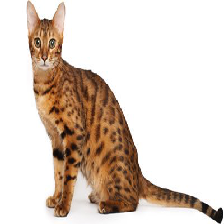

In [33]:
url_img = 'https://cdn3-www.cattime.com/assets/uploads/2011/12/file_2706_bengal-cat-breed-picture.jpg'
# ![](https://upload.wikimedia.org/wikipedia/commons/6/69/June_odd-eyed-cat_cropped.jpg)

response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((224,224))



img


In [30]:
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
X.shape

(1, 224, 224, 3)

In [0]:
y_pred = model.predict(X)

In [32]:
decode_predictions(y_pred,top=5)

[[('n02124075', 'Egyptian_cat', 0.9879497),
  ('n02127052', 'lynx', 0.008695897),
  ('n02123045', 'tabby', 0.0014082921),
  ('n02123159', 'tiger_cat', 0.0011708937),
  ('n02128757', 'snow_leopard', 0.0004323701)]]